<a href="https://colab.research.google.com/github/iamr7d/Deep-Learning/blob/main/basics_of_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers,models
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Reshape the data to add a channel dimension and normalize pixel values
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255.0
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255.0

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # First convolutional layer
    layers.MaxPooling2D((2, 2)),  # First max pooling layer
    layers.Conv2D(64, (3, 3), activation='relu'),  # Second convolutional layer
    layers.MaxPooling2D((2, 2)),  # Second max pooling layer
    layers.Conv2D(64, (3, 3), activation='relu'),  # Third convolutional layer
    layers.Flatten(),  # Flatten the output
    layers.Dense(64, activation='relu'),  # Fully connected layer
    layers.Dense(10, activation='softmax')  # Output layer with softmax for classification
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 49s 31ms/step - accuracy: 0.8805 - loss: 0.3792 - val_accuracy: 0.9834 - val_loss: 0.0583
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 79s 30ms/step - accuracy: 0.9829 - loss: 0.0525 - val_accuracy: 0.9855 - val_loss: 0.0490
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 83s 30ms/step - accuracy: 0.9891 - loss: 0.0360 - val_accuracy: 0.9849 - val_loss: 0.0484
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 30ms/step - accuracy: 0.9928 - loss: 0.0245 - val_accuracy: 0.9874 - val_loss: 0.0419
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 83s 31ms/step - accuracy: 0.9937 - loss: 0.0200 - val_accuracy: 0.9847 - val_loss: 0.0500


In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

313/313 - 2s - 7ms/step - accuracy: 0.9858 - loss: 0.0435


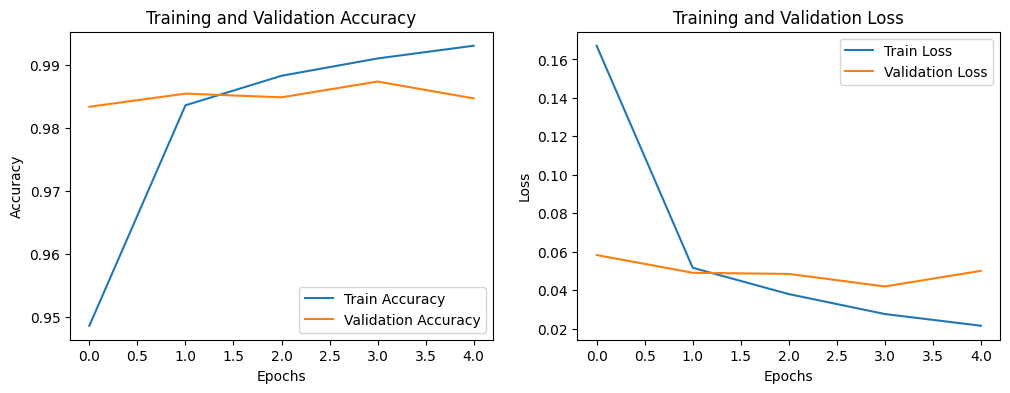

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()